In [1]:
import sys
print(sys.version)

3.10.14 (main, Mar 19 2024, 21:46:16) [Clang 15.0.0 (clang-1500.3.9.4)]


In [2]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
from cpymad.madx import Madx
import xtrack as xt

In [4]:
mad = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2024.11.19 15:59:57      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
mad.input('''
!beam,    sequence=RING605_FODO, particle="proton",energy= 8.88459;
E0 :=8.88459;
beam, particle=proton,energy= E0;

call, file="markers.def";
call, file="multipoles_madx.def";
call, file="madx_types.def";
call, file="values.dat";
call, file="madx.seq";

use, sequence=RING605_FODO;

SC220A,K2 = -0.475948;
SC220B,K2 = -0.475948;

SC222A,K2 = 0.472948;
SC222B,K2 = 0.472948;

SC319A,K2 = 0.480748;
SC319B,K2 = 0.480748;

SC321A,K2 = -0.483748;
SC321B,K2 = -0.483748;

twiss,chrom,sequence=RING605_FODO,file="nocomp_twiss_cpymad.tfs";

PTC_CREATE_UNIVERSE;
PTC_CREATE_LAYOUT, MODEL=1, METHOD=6, NST=10;
SELECT, FLAG=ptc_twiss, CLEAR;
PTC_TWISS, ICASE=5, CLOSED_ORBIT=TRUE, NO=4, NORMAL=TRUE, TRACKRDTS=TRUE;
PTC_END;

SELECT, FLAG=twissrdt, CLEAR;
WRITE, TABLE=twissrdt, file="nocomp_ptc_rdt.tfs";

''')

MSTART        : MARKER ;

MTSP          : MARKER ;

MTSPIP        : MARKER ;

BELLOW        : MARKER ;

PCOL613       : MARKER ;

US_FLANGE     : MARKER ;

SCOL613US     : MARKER ;

SCOL613DS     : MARKER ;

SCOL616US     : MARKER ;

SCOL616DS     : MARKER ;

LAM102_US     : MARKER ;

MRKRRLAM      : MARKER ;

MLAM102U      : MARKER ;

MLAM102D      : MARKER ;

LAM102_DS     : MARKER ;

MW102U        : MARKER ;

MW102D        : MARKER ;

IPMV          : MARKER ;

MW103U        : MARKER ;

MW103D        : MARKER ;

MW104U        : MARKER ;

MW104D        : MARKER ;

IPMH          : MARKER ;

MW105U        : MARKER ;

MW105D        : MARKER ;

MRKRRKICK     : MARKER ;

Q232CMID      : MARKER ;

LAM232_US     : MARKER ;

MLAM232U      : MARKER ;

MLAM232D      : MARKER ;

LAM232_DS     : MARKER ;

BUMPEND232    : MARKER ;

LAM402_US     : MARKER ;

MLAM402U      : MARKER ;

MLAM402D      : MARKER ;

LAM402_DS     : MARKER ;

LAM522_US     : MARKER ;

MLAM522U      : MARKER ;

MLAM522D    

True

In [6]:
qx = 25.44214772
qy = 24.39049949
ss = []
ssk2l = []
k2ls = []
k2sls = []
f3000s = []
f1020s = []
f0030s = []
f2010s = []
names = []

for name,si,k2li,k2sli,f3000real,f3000imag,f1020real,f1020imag,f0030real,f0030imag,f2010real,f2010imag in zip(mad.table.twissrdt['name'],mad.table.twissrdt['s'],mad.table.twissrdt['k2l'],mad.table.twissrdt['k2sl'],mad.table.twissrdt['GNFC_3_0_0_0_0_0'],mad.table.twissrdt['GNFS_3_0_0_0_0_0'],mad.table.twissrdt['GNFC_1_0_2_0_0_0'],mad.table.twissrdt['GNFS_1_0_2_0_0_0'],mad.table.twissrdt['GNFC_0_0_3_0_0_0'],mad.table.twissrdt['GNFS_0_0_3_0_0_0'],mad.table.twissrdt['GNFC_2_0_1_0_0_0'],mad.table.twissrdt['GNFS_2_0_1_0_0_0']):
    ssk2l.append(si)
    k2ls.append(k2li)
    k2sls.append(k2sli)
    
    if "hp" in name:
        names.append(name[:-2].upper())
        ss.append(si)
        f3000s.append(f3000real+1j*f3000imag)
        f1020s.append(f1020real+1j*f1020imag)
        f0030s.append(f0030real+1j*f0030imag)
        f2010s.append(f2010real+1j*f2010imag)
        
ss = np.array(ss)
ssk2l = np.array(ssk2l)
k2ls = np.array(k2ls)

f3000s = np.array(f3000s)
h3000s = f3000s*(1.0-np.exp(2*np.pi*1j*3*qx))

f1020s = np.array(f1020s)
h1020s = f1020s*(1.0-np.exp(2*np.pi*1j*(1*qx+2*qy)))

f0030s = np.array(f0030s)
h0030s = f0030s*(1.0-np.exp(2*np.pi*1j*3*qy))

f2010s = np.array(f2010s)
h2010s = f2010s*(1.0-np.exp(2*np.pi*1j*(2*qx+1*qy)))

names = np.array(names)

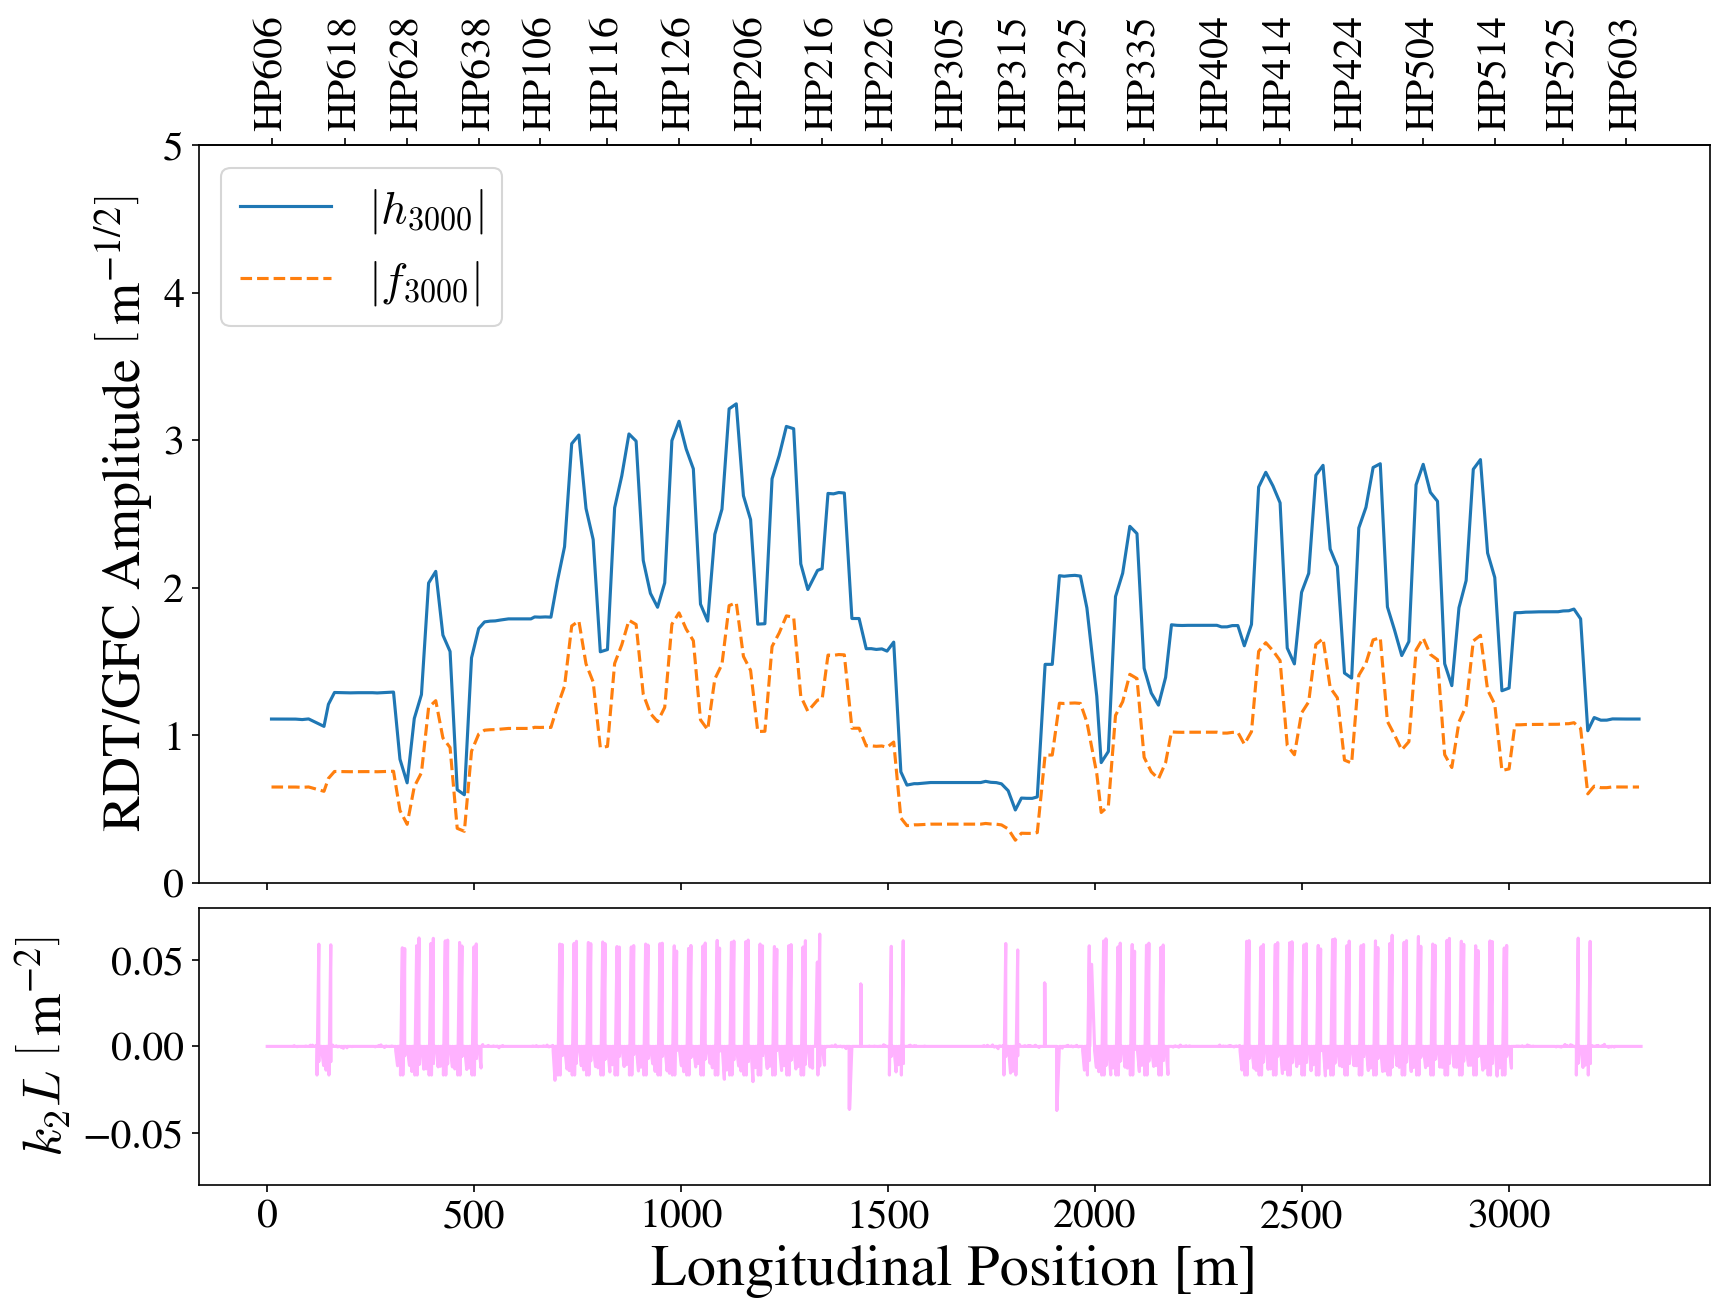

In [7]:
fig,(ax,axk2) = plt.subplots(2,1,figsize = (13,9),sharex = True,gridspec_kw={'height_ratios': [4,1.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$')
ax.plot(ss,np.abs(f3000s), '--',label = r'$|f_{3000}|$')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5)

ax.set_ylabel(r'RDT/GFC Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 22)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

# axk2 = ax.twinx()

axk2.plot(ssk2l,k2ls,c = 'fuchsia', alpha = 0.3)

axk2.set_ylim(-0.08,0.08)
axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2 L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 26)
axk2.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('h3000_with_comp.png')

plt.show()
plt.close()



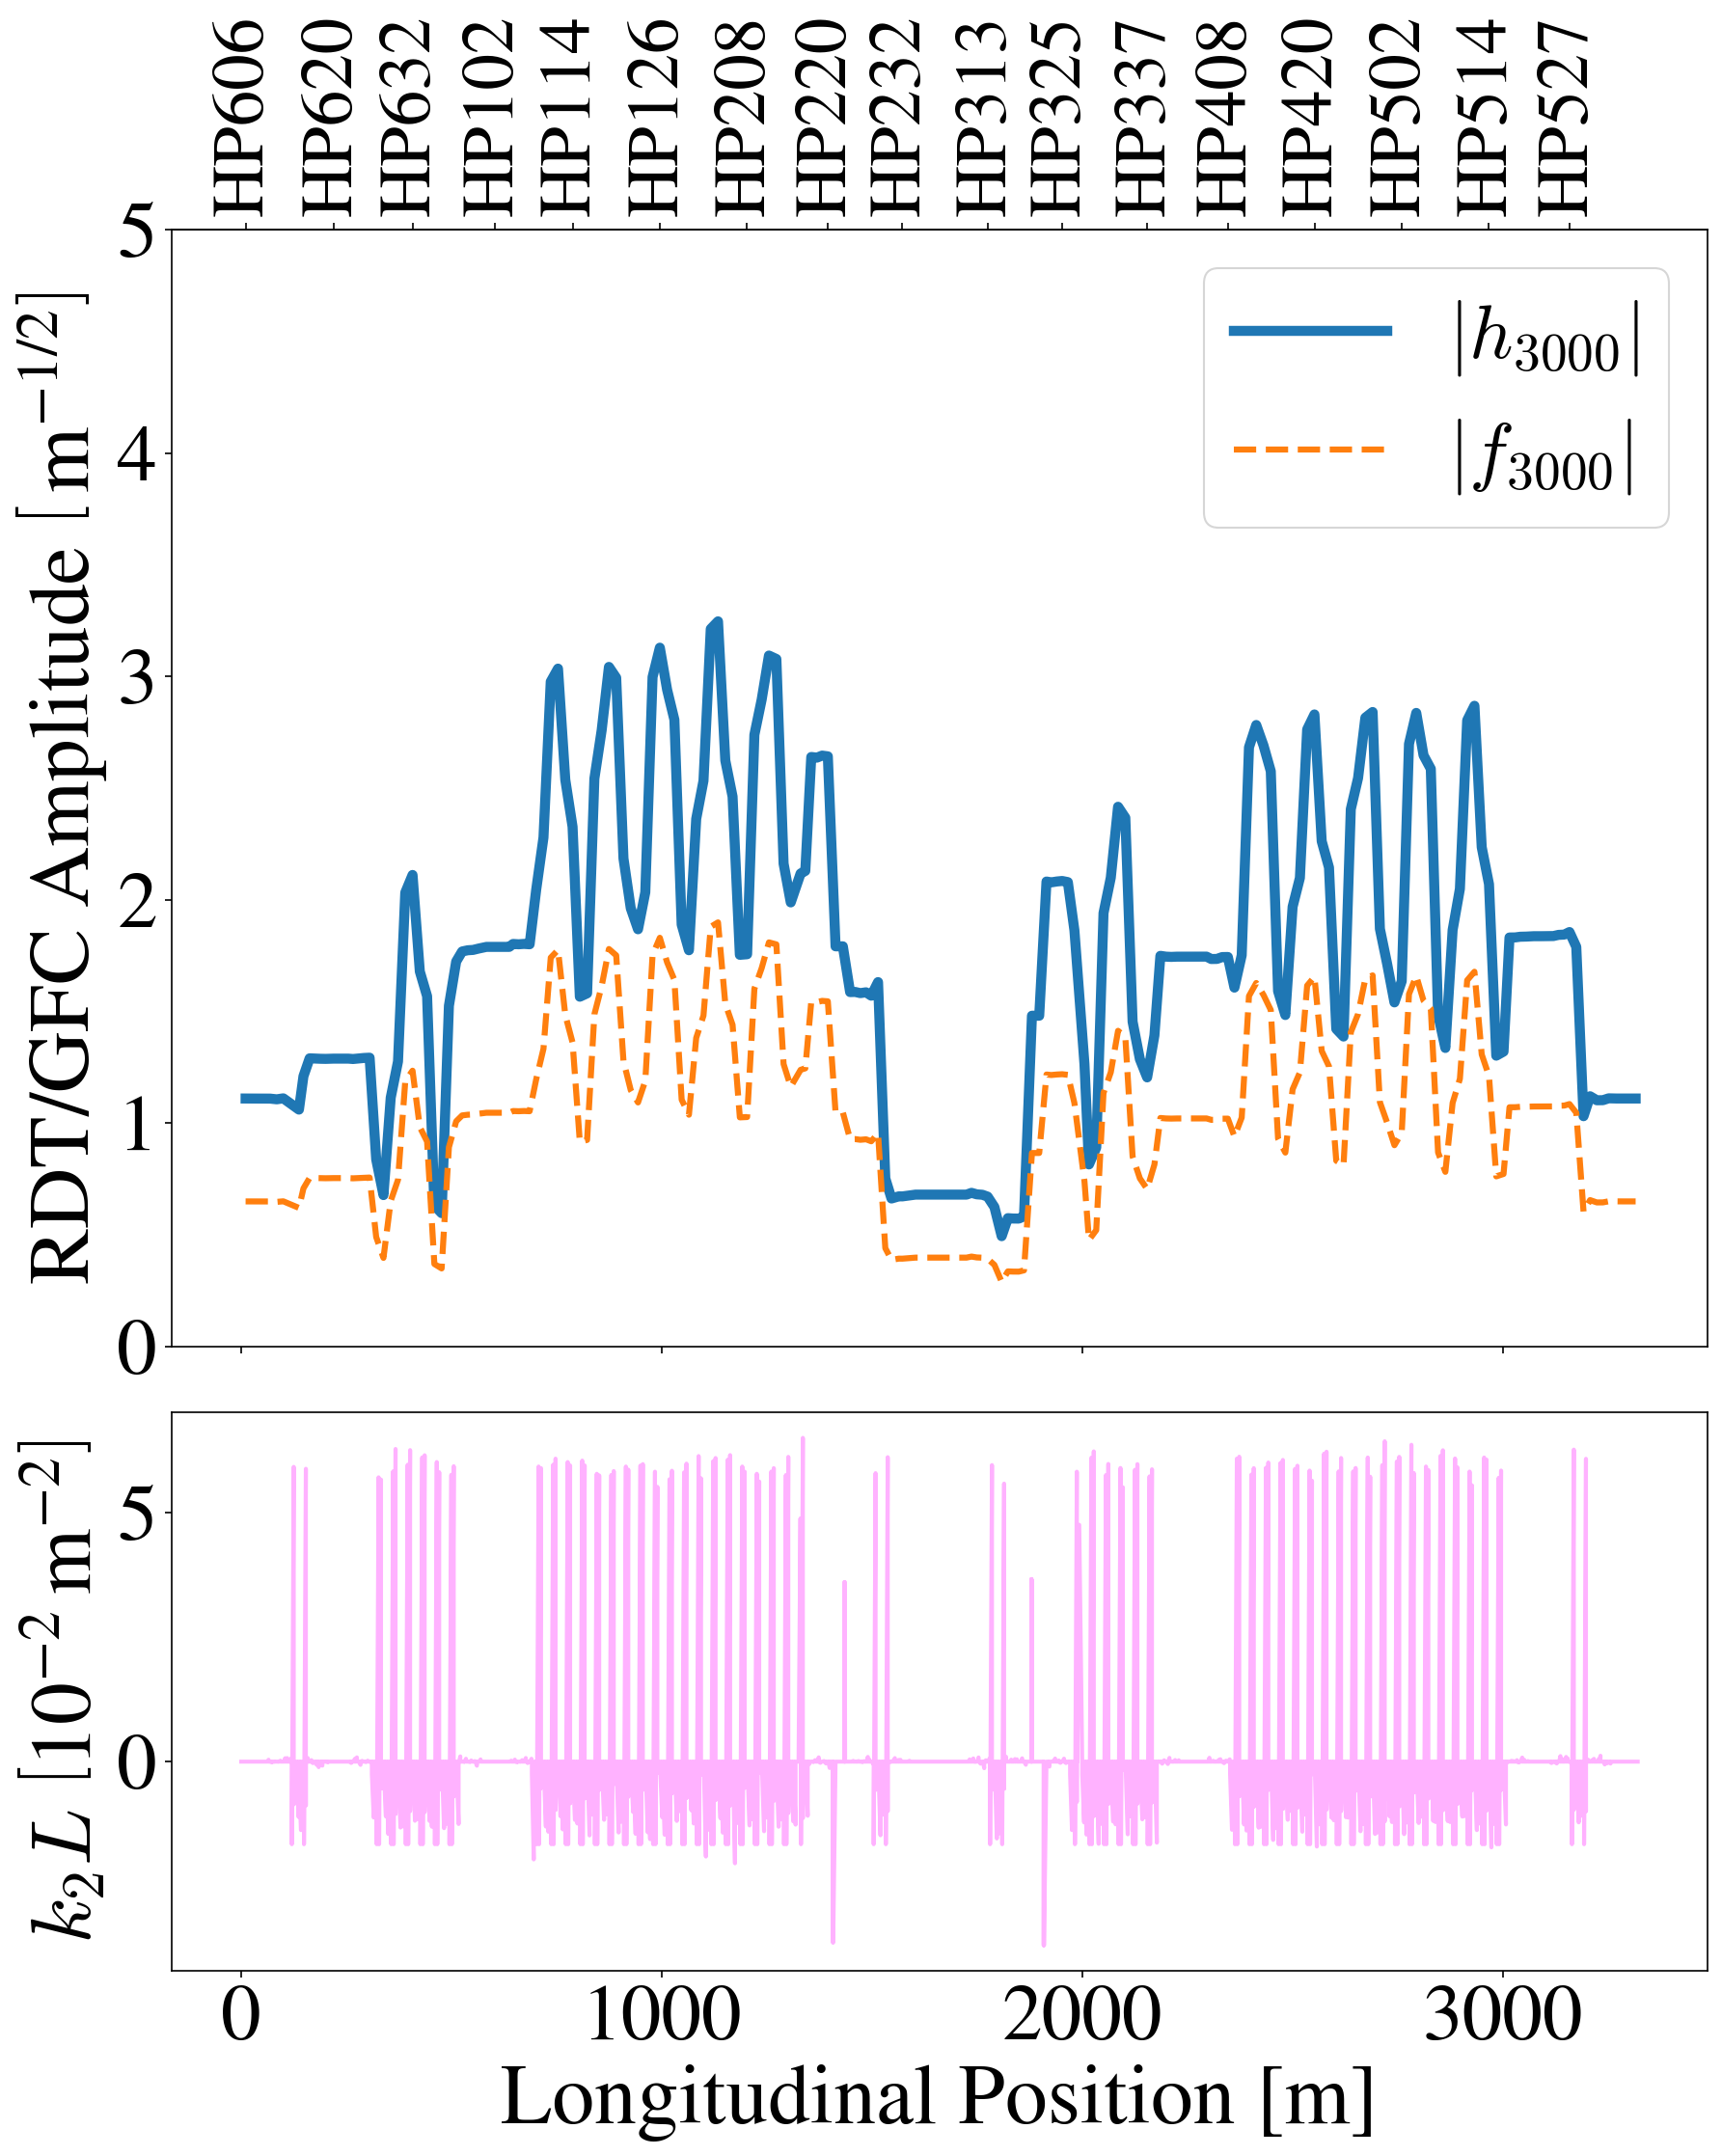

In [8]:
fig,(ax,axk2) = plt.subplots(2,1,figsize = (12,15),sharex = True,gridspec_kw={'height_ratios': [5,2.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$', linewidth = 5)
ax.plot(ss,np.abs(f3000s), '--',label = r'$|f_{3000}|$', linewidth = 3)
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5)

ax.set_ylabel(r'RDT/GFC Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize =42)

ax.tick_params(axis='both', labelsize=40)

ax.legend(loc = 'upper right',fontsize = 38)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::12])
axt.set_xticklabels(names[::12],rotation = 90,fontsize = 36)

# axk2 = ax.twinx()

axk2.plot(ssk2l,k2ls*100,c = 'fuchsia', alpha = 0.3, linewidth = 2)

# axk2.set_ylim(-0.08,0.08)
axk2.set_xlabel('Longitudinal Position [m]',fontsize = 42)
axk2.set_ylabel(r'$k_2 L$ $\mathregular{\left[ 10^{-2} \, m^{-2} \right] }$',fontsize = 42)
axk2.tick_params(axis='both', labelsize=40)

plt.subplots_adjust(hspace=0.05)

plt.tight_layout()

# plt.savefig('h3000_no_comp.png')
# plt.savefig('h3000_no_comp.pdf')
# plt.savefig('h3000_with_opticomp.pdf')
plt.savefig('h3000_with_comp.pdf')

plt.show()
plt.close()



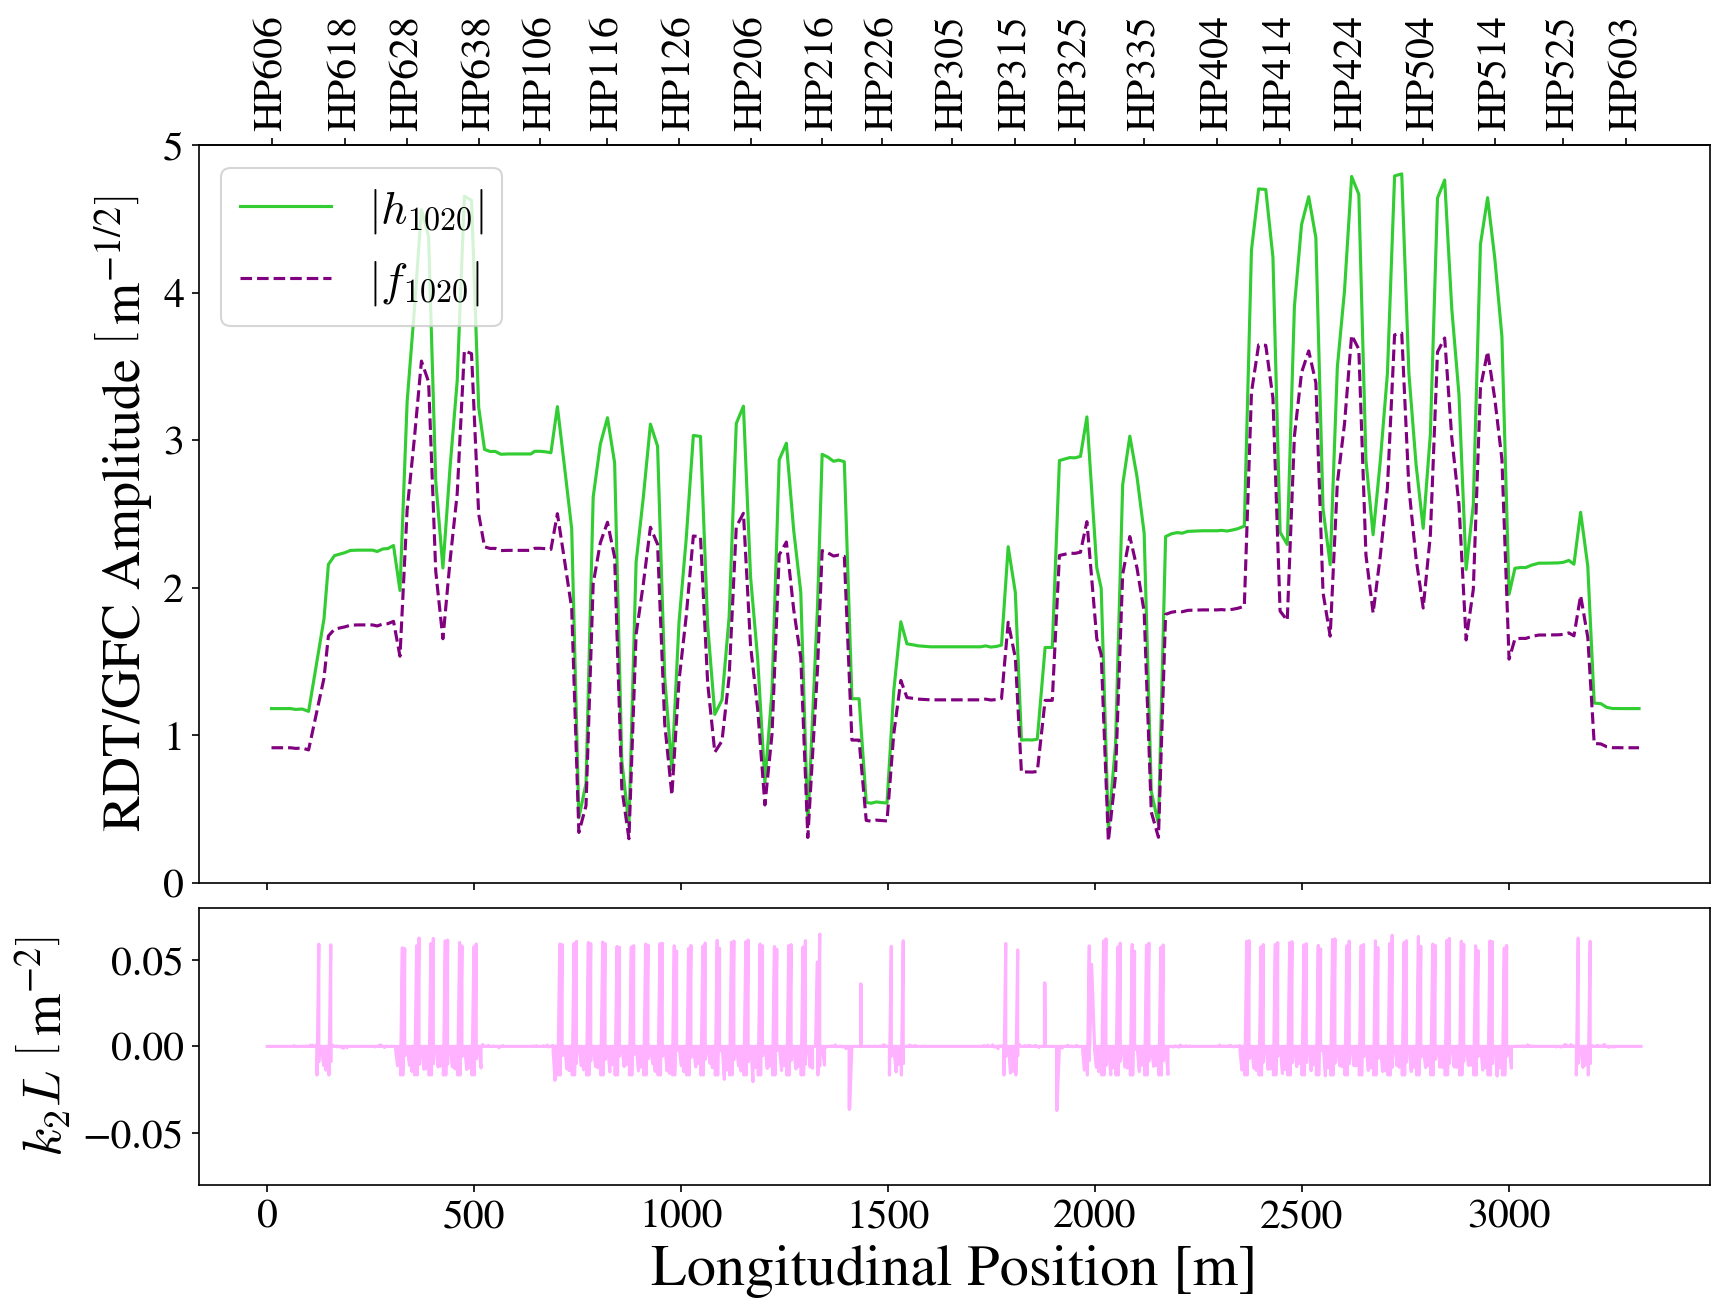

In [9]:
fig,(ax,axk2) = plt.subplots(2,1,figsize = (13,9),sharex = True,gridspec_kw={'height_ratios': [4,1.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h1020s), label = r'$|h_{1020}|$',c = 'limegreen')
ax.plot(ss,np.abs(f1020s), '--',label = r'$|f_{1020}|$',c= 'purple')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5)

ax.set_ylabel(r'RDT/GFC Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 22)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

# axk2 = ax.twinx()

axk2.plot(ssk2l,k2ls,c = 'fuchsia', alpha = 0.3)

axk2.set_ylim(-0.08,0.08)
axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2 L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 26)
axk2.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('h1020_with_comp.png')

plt.show()
plt.close()



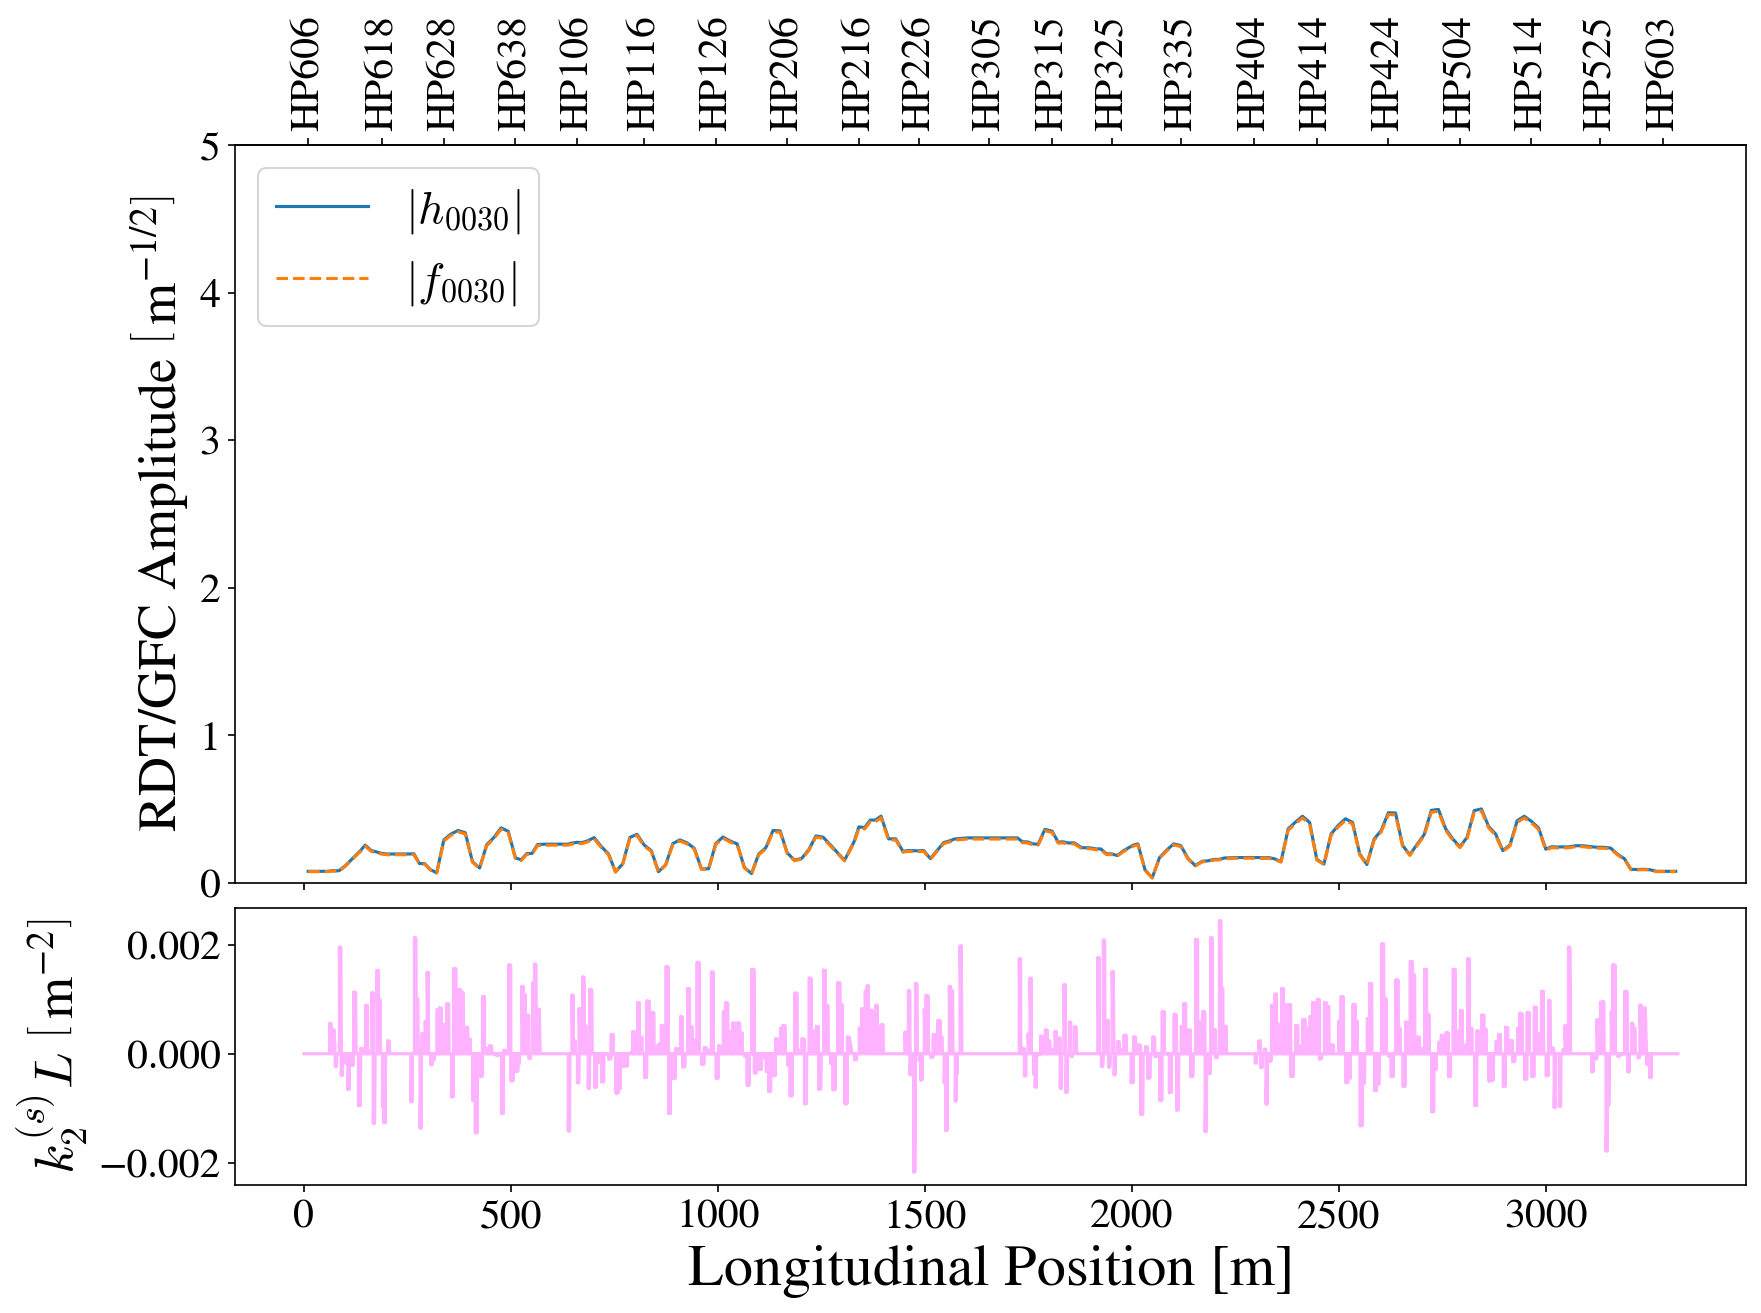

In [10]:
fig,(ax,axk2) = plt.subplots(2,1,figsize = (13,9),sharex = True,gridspec_kw={'height_ratios': [4,1.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h0030s), label = r'$|h_{0030}|$')
ax.plot(ss,np.abs(f0030s), '--',label = r'$|f_{0030}|$')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5)

ax.set_ylabel(r'RDT/GFC Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 22)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

# axk2 = ax.twinx()

axk2.plot(ssk2l,k2sls,c = 'fuchsia', alpha = 0.3)

# axk2.set_ylim(-0.08,0.08)
axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2^{(s)} L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 26)
axk2.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('h0030_with_comp.png')

plt.show()
plt.close()



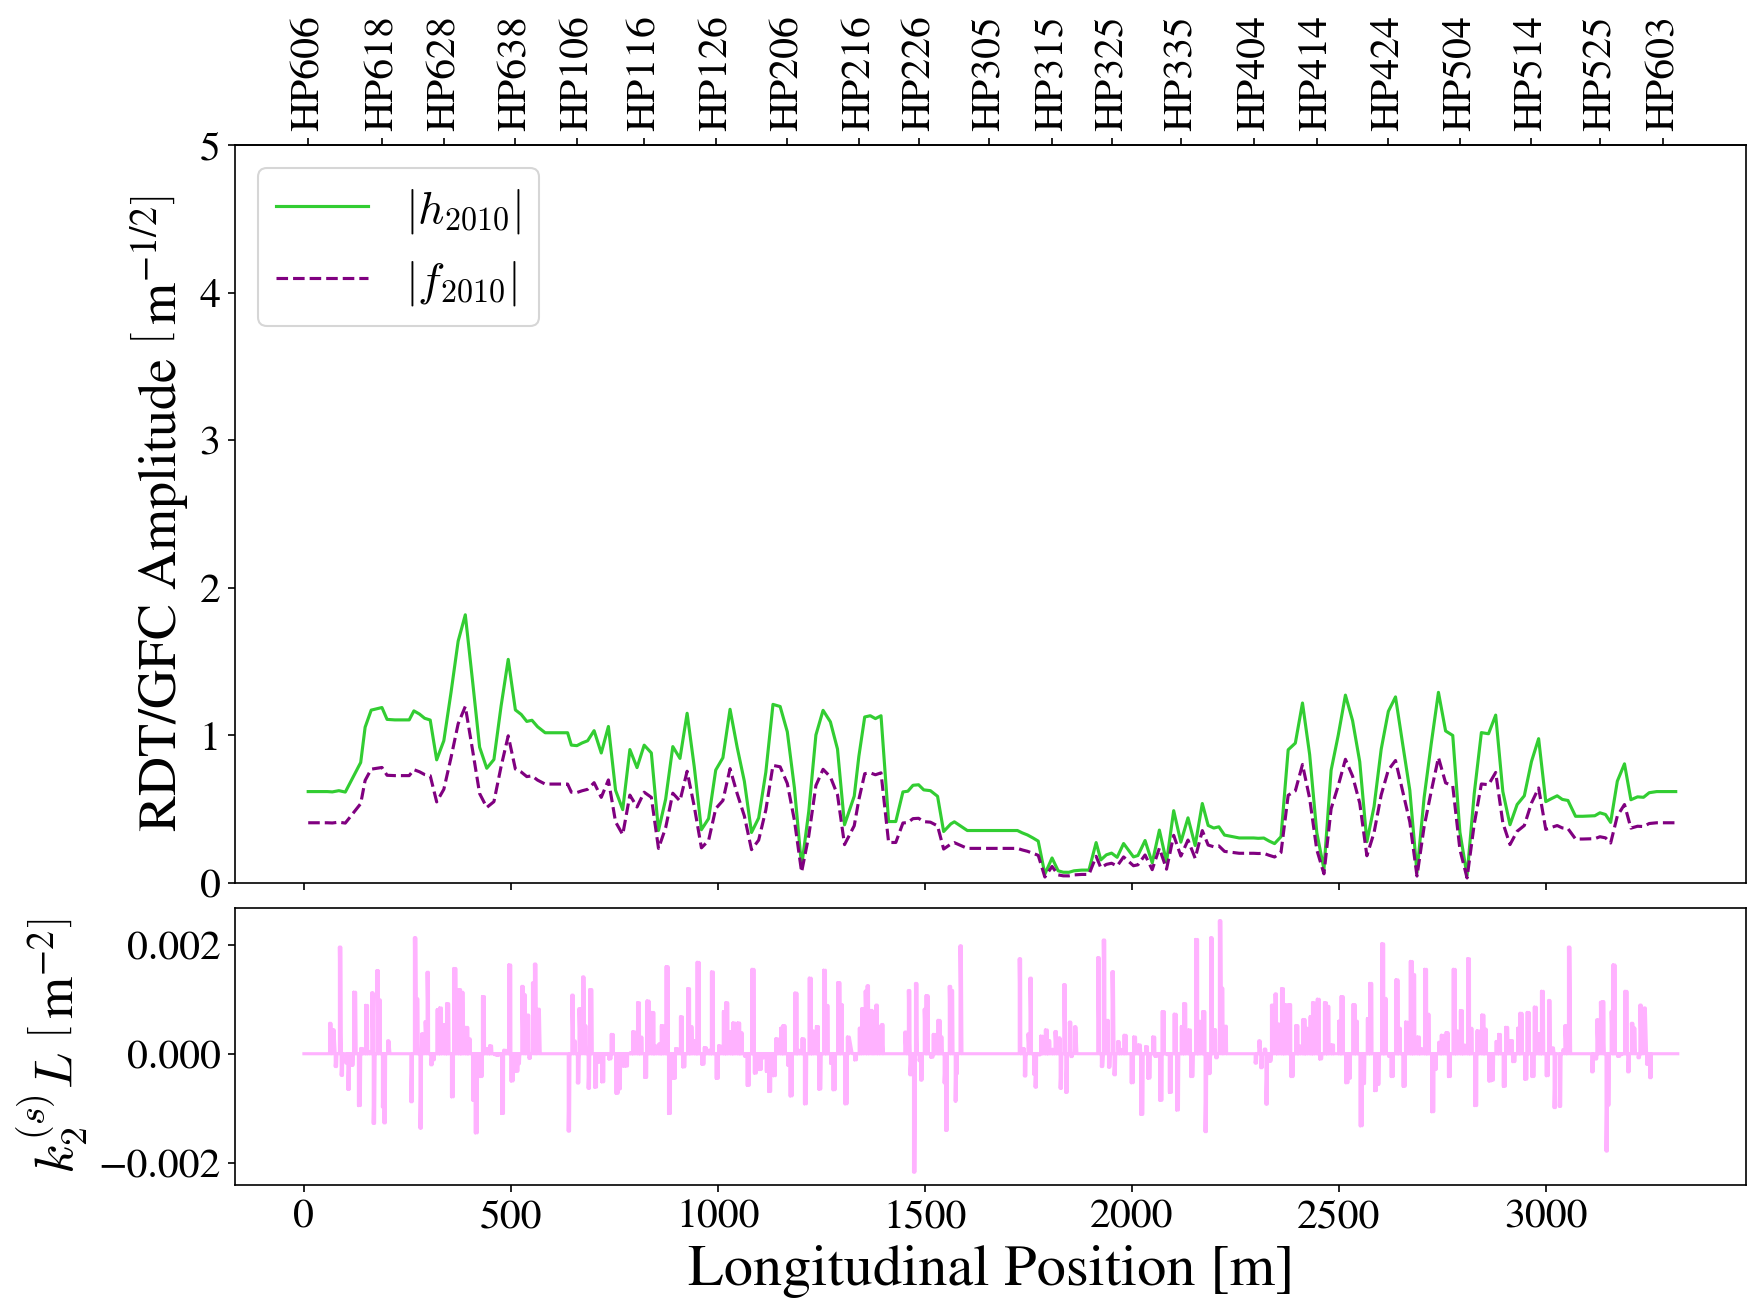

In [11]:
fig,(ax,axk2) = plt.subplots(2,1,figsize = (13,9),sharex = True,gridspec_kw={'height_ratios': [4,1.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h2010s), label = r'$|h_{2010}|$',c = 'limegreen')
ax.plot(ss,np.abs(f2010s), '--',label = r'$|f_{2010}|$',c= 'purple')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5)

ax.set_ylabel(r'RDT/GFC Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 22)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

# axk2 = ax.twinx()

axk2.plot(ssk2l,k2sls,c = 'fuchsia', alpha = 0.3)

# axk2.set_ylim(-0.08,0.08)
axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2^{(s)} L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 26)
axk2.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('h2010_with_comp.png')

plt.show()
plt.close()



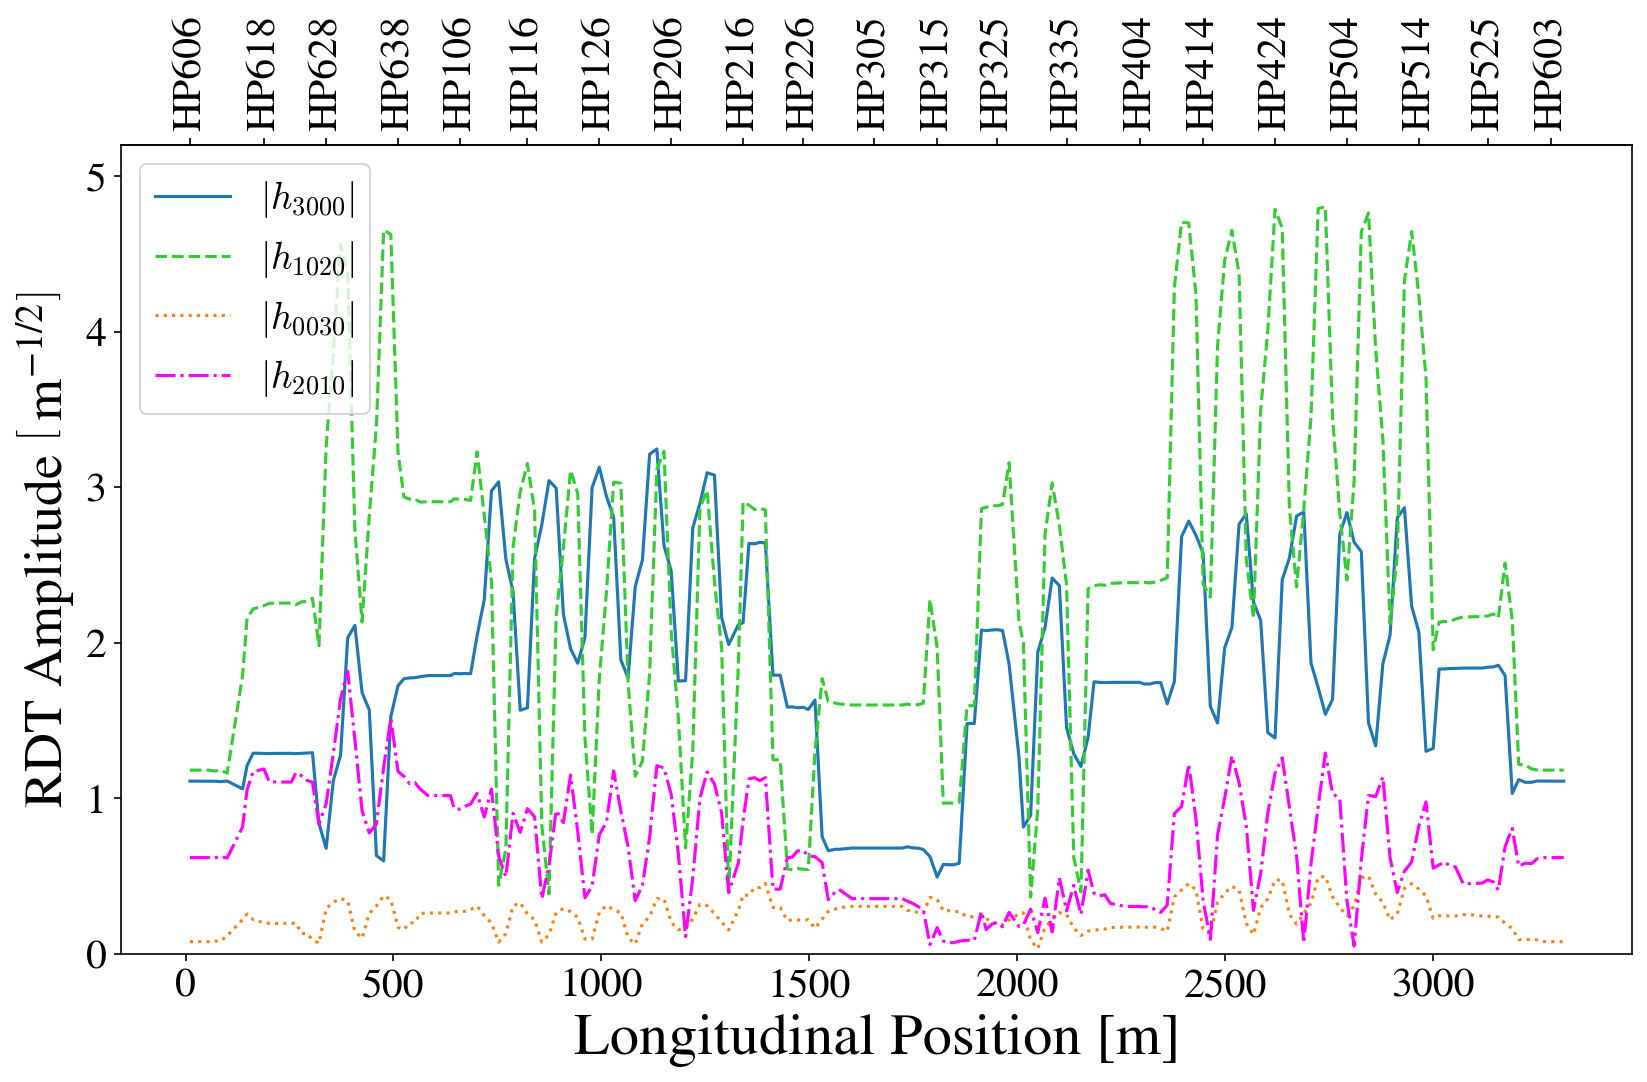

In [12]:
fig,ax = plt.subplots(1,1,figsize = (13,7))

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$')
ax.plot(ss,np.abs(h1020s), linestyle = 'dashed',label = r'$|h_{1020}|$',c = 'limegreen')
ax.plot(ss,np.abs(h0030s), linestyle = 'dotted',label = r'$|h_{0030}|$')
ax.plot(ss,np.abs(h2010s), linestyle = 'dashdot',label = r'$|h_{2010}|$',c = 'fuchsia')


#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5.2)

ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 18)

ax.set_xlabel('Longitudinal Position [m]',fontsize = 28)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('hall_with_comp.png')

plt.show()
plt.close()



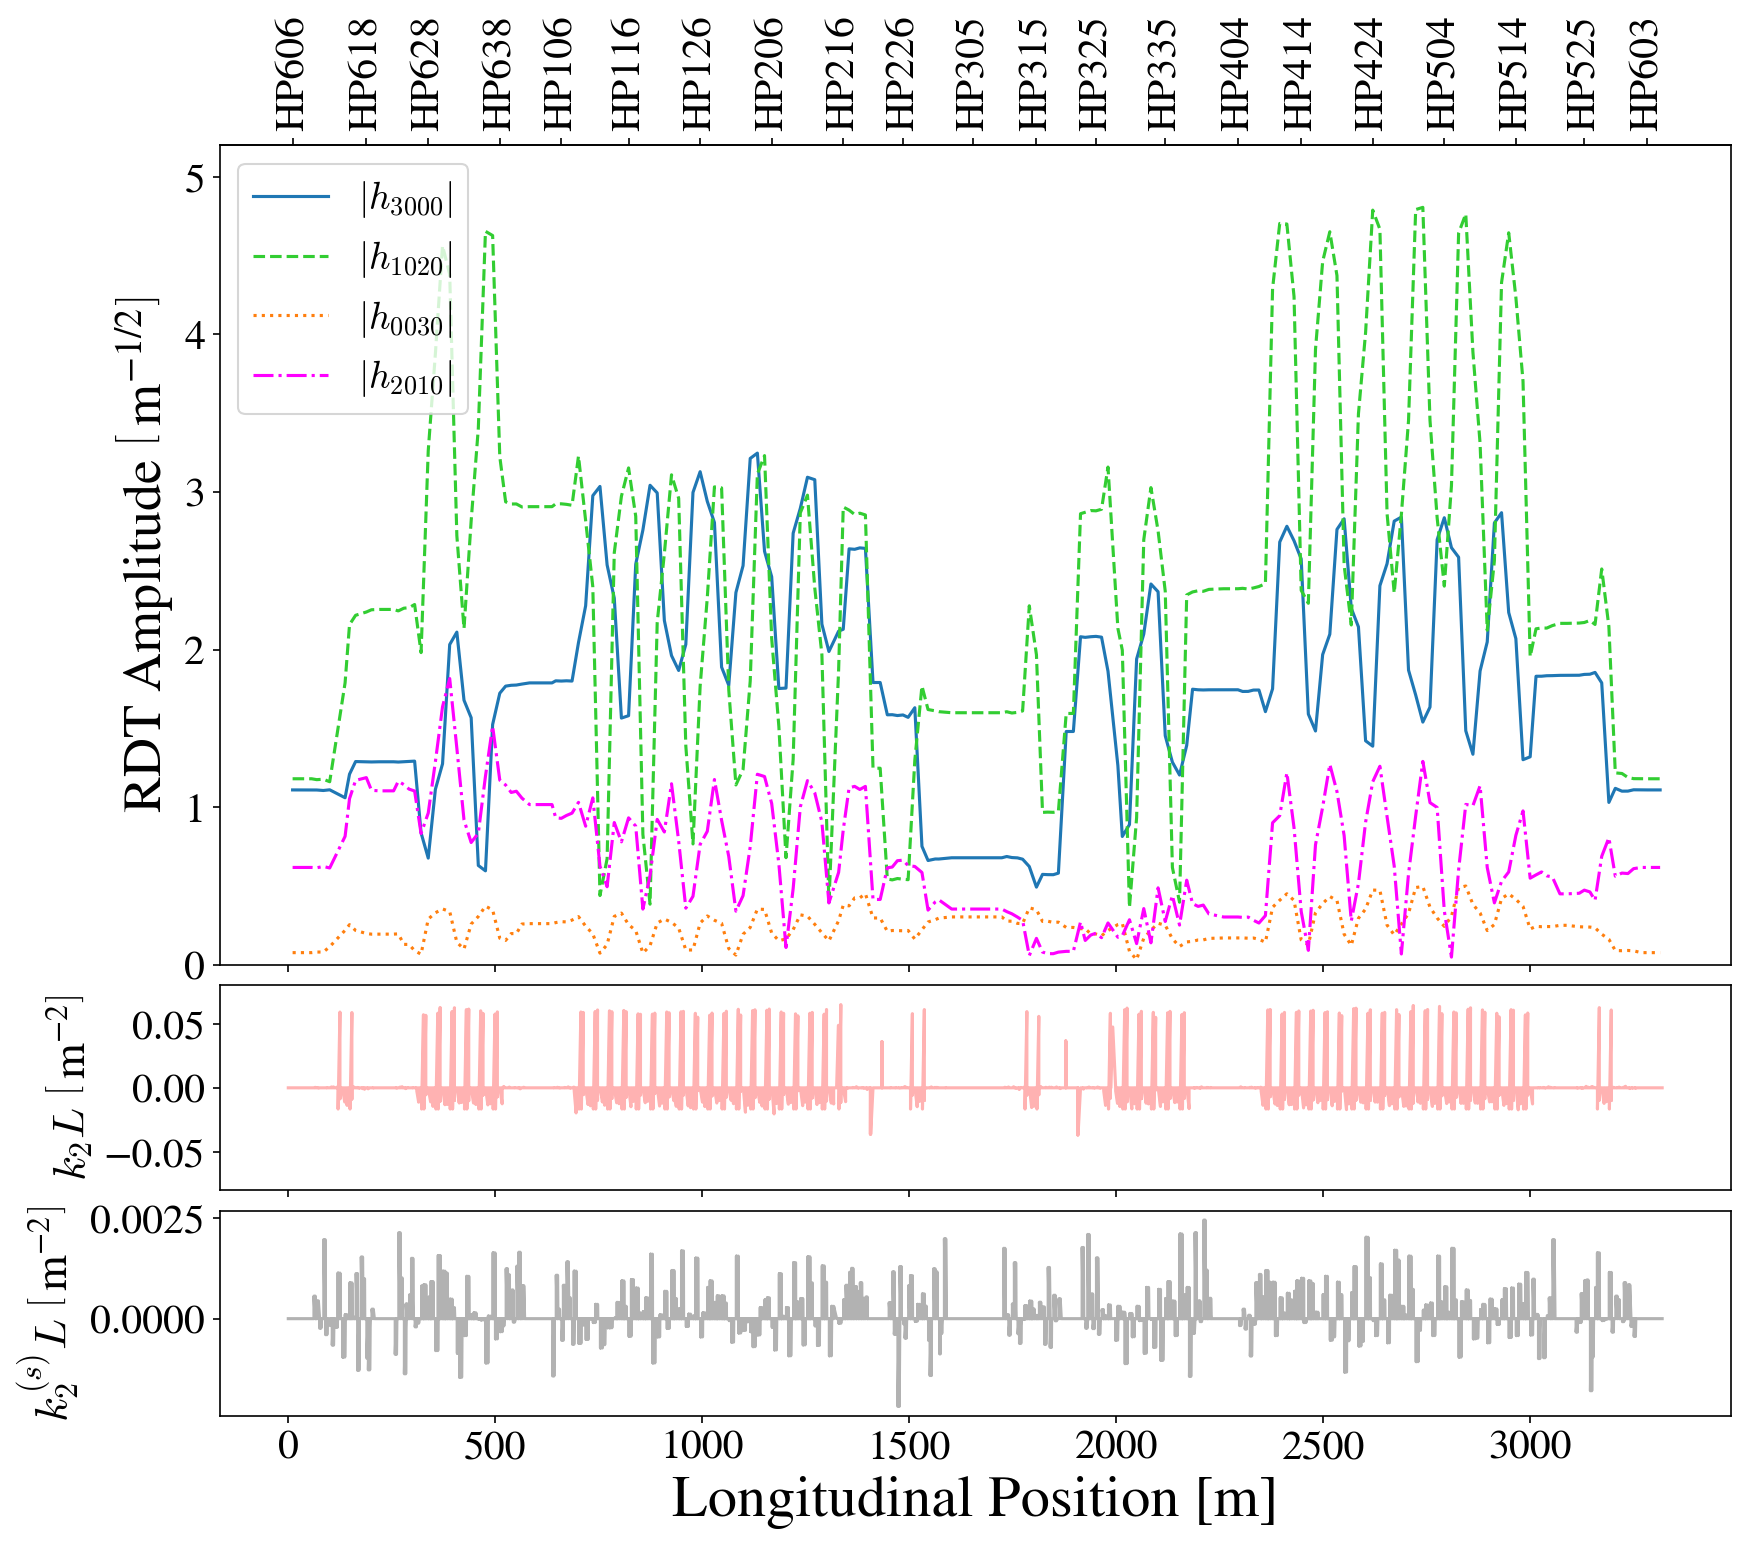

In [13]:
fig,(ax,axk2,axk2s) = plt.subplots(3,1,figsize = (13,11),sharex = True,gridspec_kw={'height_ratios': [4,1,1]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$')
ax.plot(ss,np.abs(h1020s), linestyle = 'dashed',label = r'$|h_{1020}|$',c = 'limegreen')
ax.plot(ss,np.abs(h0030s), linestyle = 'dotted',label = r'$|h_{0030}|$')
ax.plot(ss,np.abs(h2010s), linestyle = 'dashdot',label = r'$|h_{2010}|$',c = 'fuchsia')


#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5.2)

ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=20)

ax.legend(loc = 'upper left',fontsize = 18)

# ax.set_xlabel('Longitudinal Position [m]',fontsize = 28)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 20)

axk2.plot(ssk2l,k2ls,c = 'red', alpha = 0.3)

axk2.set_ylim(-0.08,0.08)
# axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2 L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 22)
axk2.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

axk2s.plot(ssk2l,k2sls,c = 'black', alpha = 0.3)

# axk2.set_ylim(-0.08,0.08)
axk2s.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2s.set_ylabel(r'$k_2^{(s)} L$ $\mathregular{\left[ \, m^{-2} \right] }$',fontsize = 22)
axk2s.tick_params(axis='both', labelsize=20)

plt.subplots_adjust(hspace=0.05)

plt.savefig('hallk2_with_comp.png')

plt.show()
plt.close()



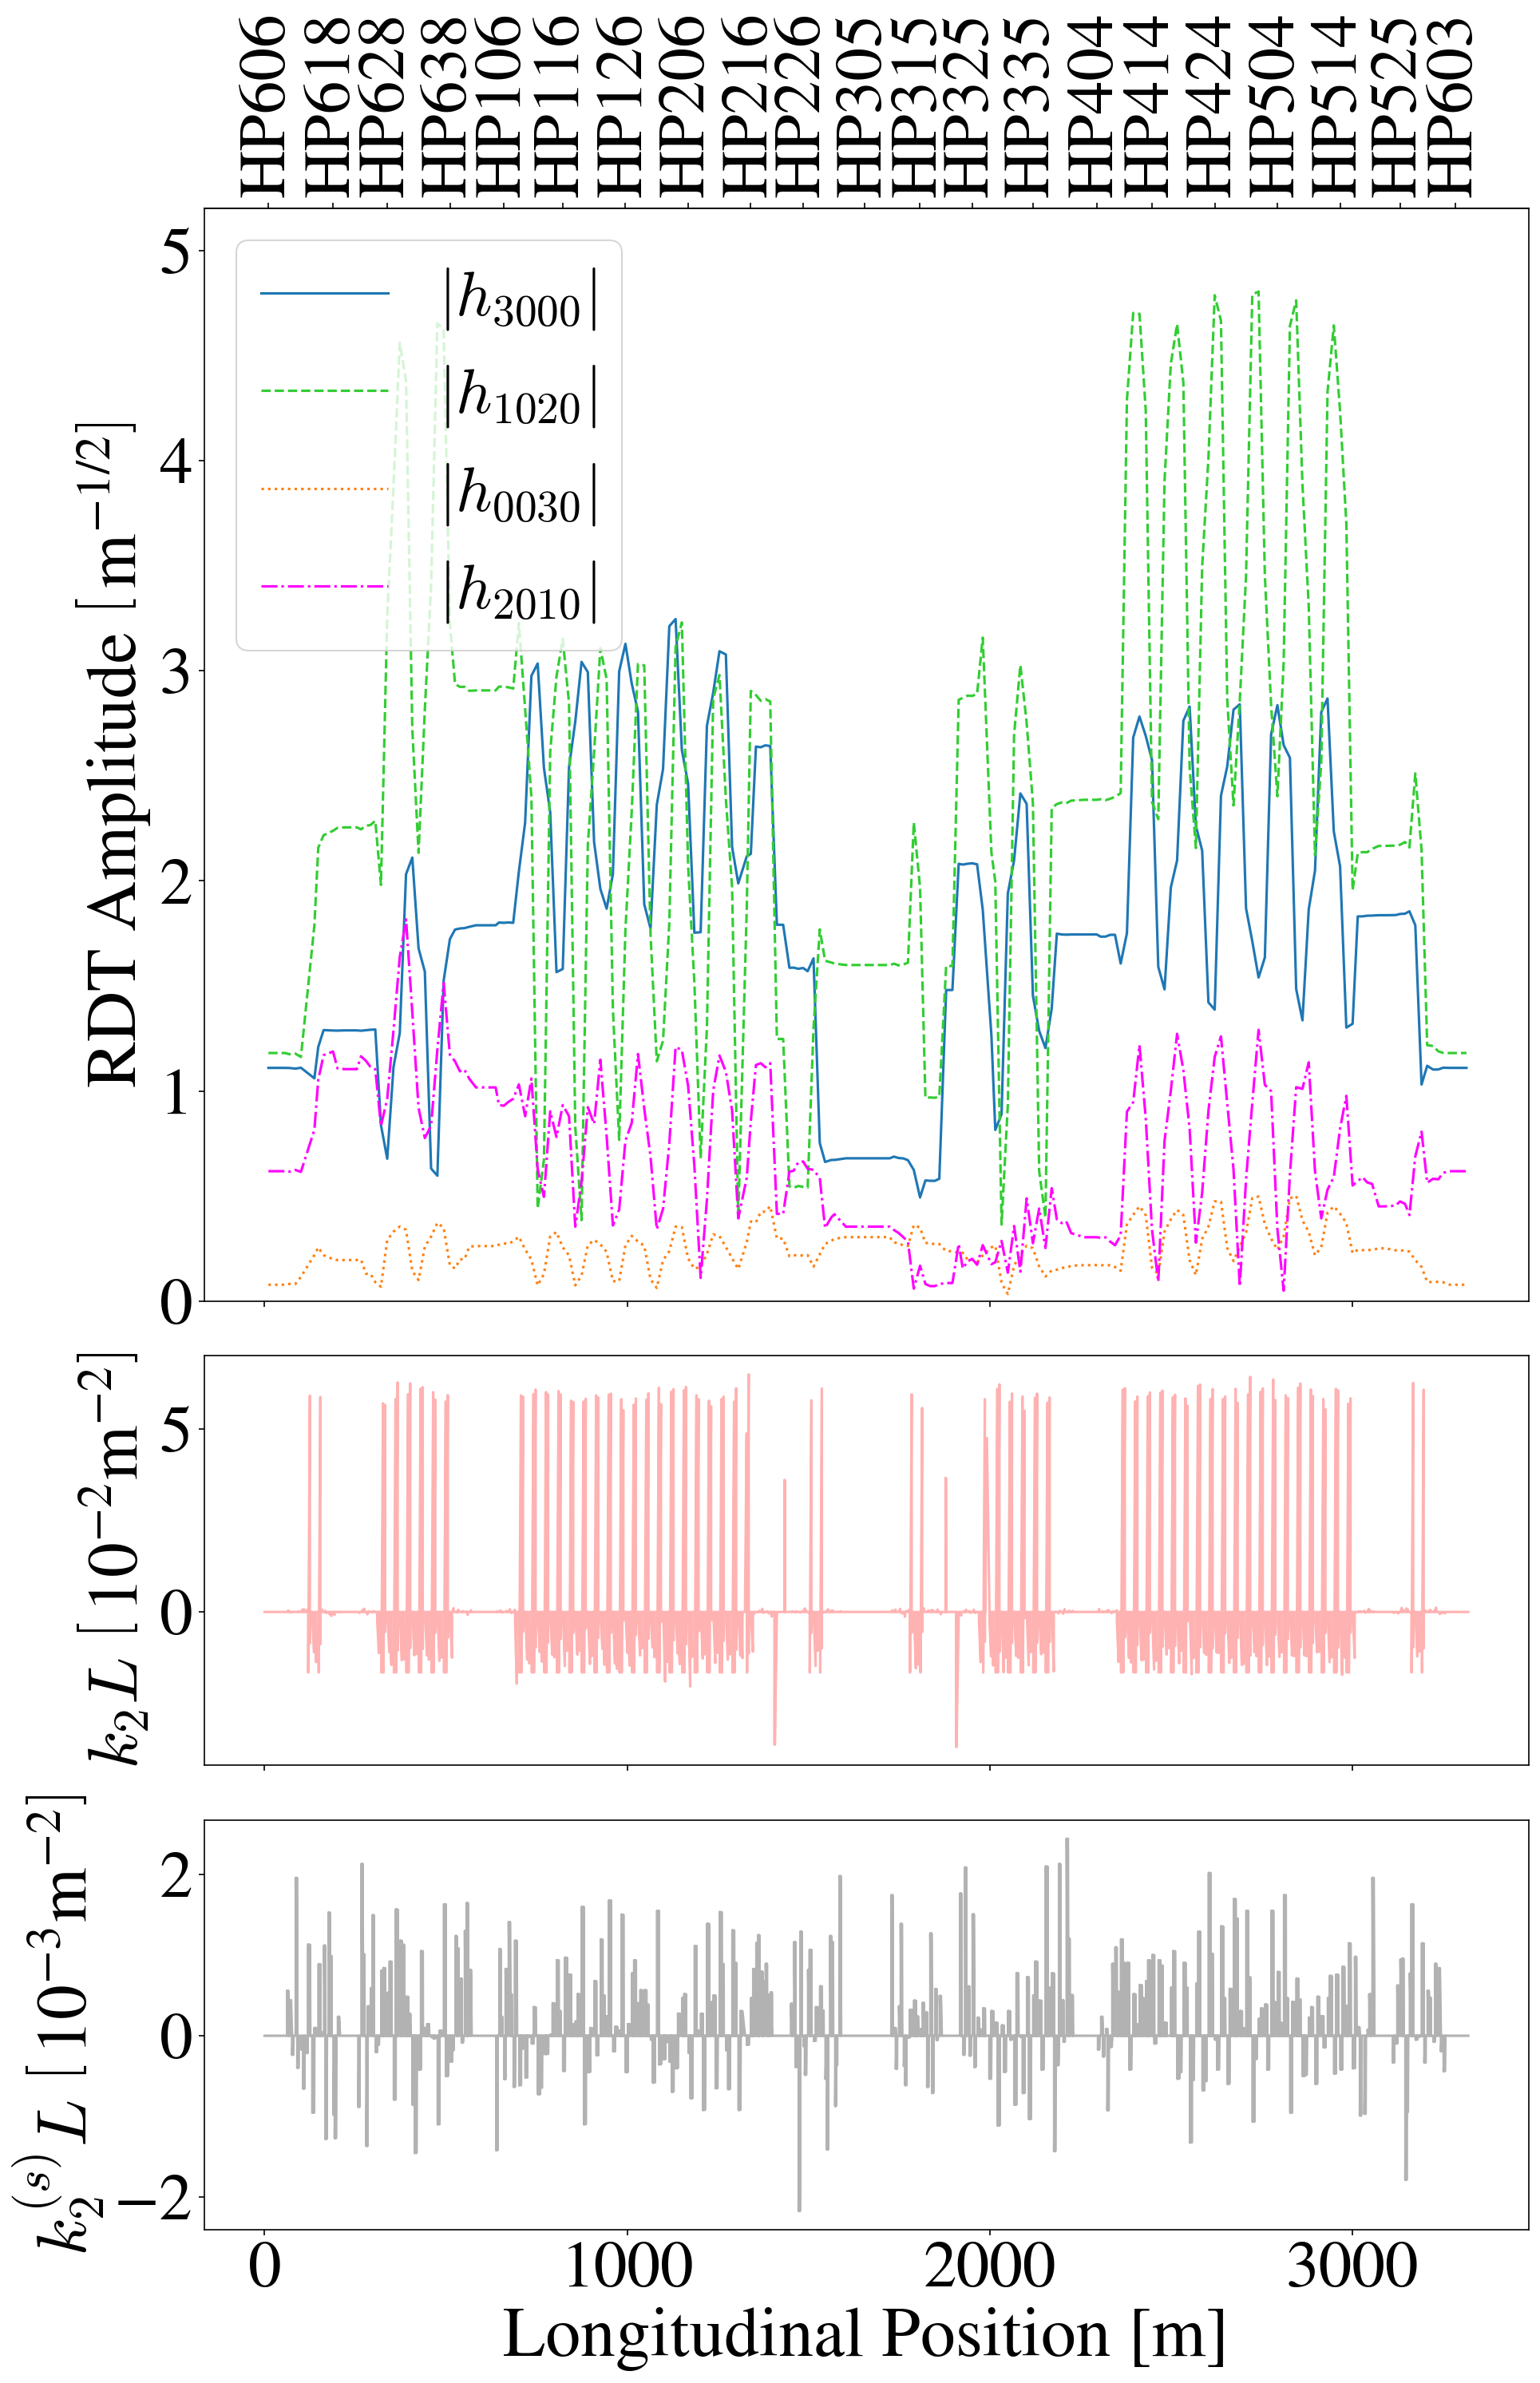

In [14]:
fig,(ax,axk2,axk2s) = plt.subplots(3,1,figsize = (13,20),sharex = True,gridspec_kw={'height_ratios': [4,1.5,1.5]})

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$')
ax.plot(ss,np.abs(h1020s), linestyle = 'dashed',label = r'$|h_{1020}|$',c = 'limegreen')
ax.plot(ss,np.abs(h0030s), linestyle = 'dotted',label = r'$|h_{0030}|$')
ax.plot(ss,np.abs(h2010s), linestyle = 'dashdot',label = r'$|h_{2010}|$',c = 'fuchsia')


#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,5.2)

ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 42)

ax.tick_params(axis='both', labelsize=40)

ax.legend(loc = 'upper left',fontsize = 38)

# ax.set_xlabel('Longitudinal Position [m]',fontsize = 28)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(names[::10],rotation = 90,fontsize = 40)

axk2.plot(ssk2l,k2ls*100,c = 'red', alpha = 0.3)

# axk2.set_ylim(-0.08,0.08)
# axk2.set_xlabel('Longitudinal Position [m]',fontsize = 28)
axk2.set_ylabel(r'$k_2 L$ $\mathregular{\left[ \, 10^{-2} m^{-2} \right] }$',fontsize = 42)
axk2.tick_params(axis='both', labelsize=40)

plt.subplots_adjust(hspace=0.05)

axk2s.plot(ssk2l,np.array(k2sls)*1000,c = 'black', alpha = 0.3)

# axk2.set_ylim(-0.08,0.08)
axk2s.set_xlabel('Longitudinal Position [m]',fontsize = 42)
axk2s.set_ylabel(r'$k_2^{(s)} L$ $\mathregular{\left[ \, 10^{-3} m^{-2} \right] }$',fontsize = 42)
axk2s.tick_params(axis='both', labelsize=40)

plt.subplots_adjust(hspace=0.05)

plt.tight_layout()
#plt.savefig('hallk2_no_comp.png')

plt.show()
plt.close()



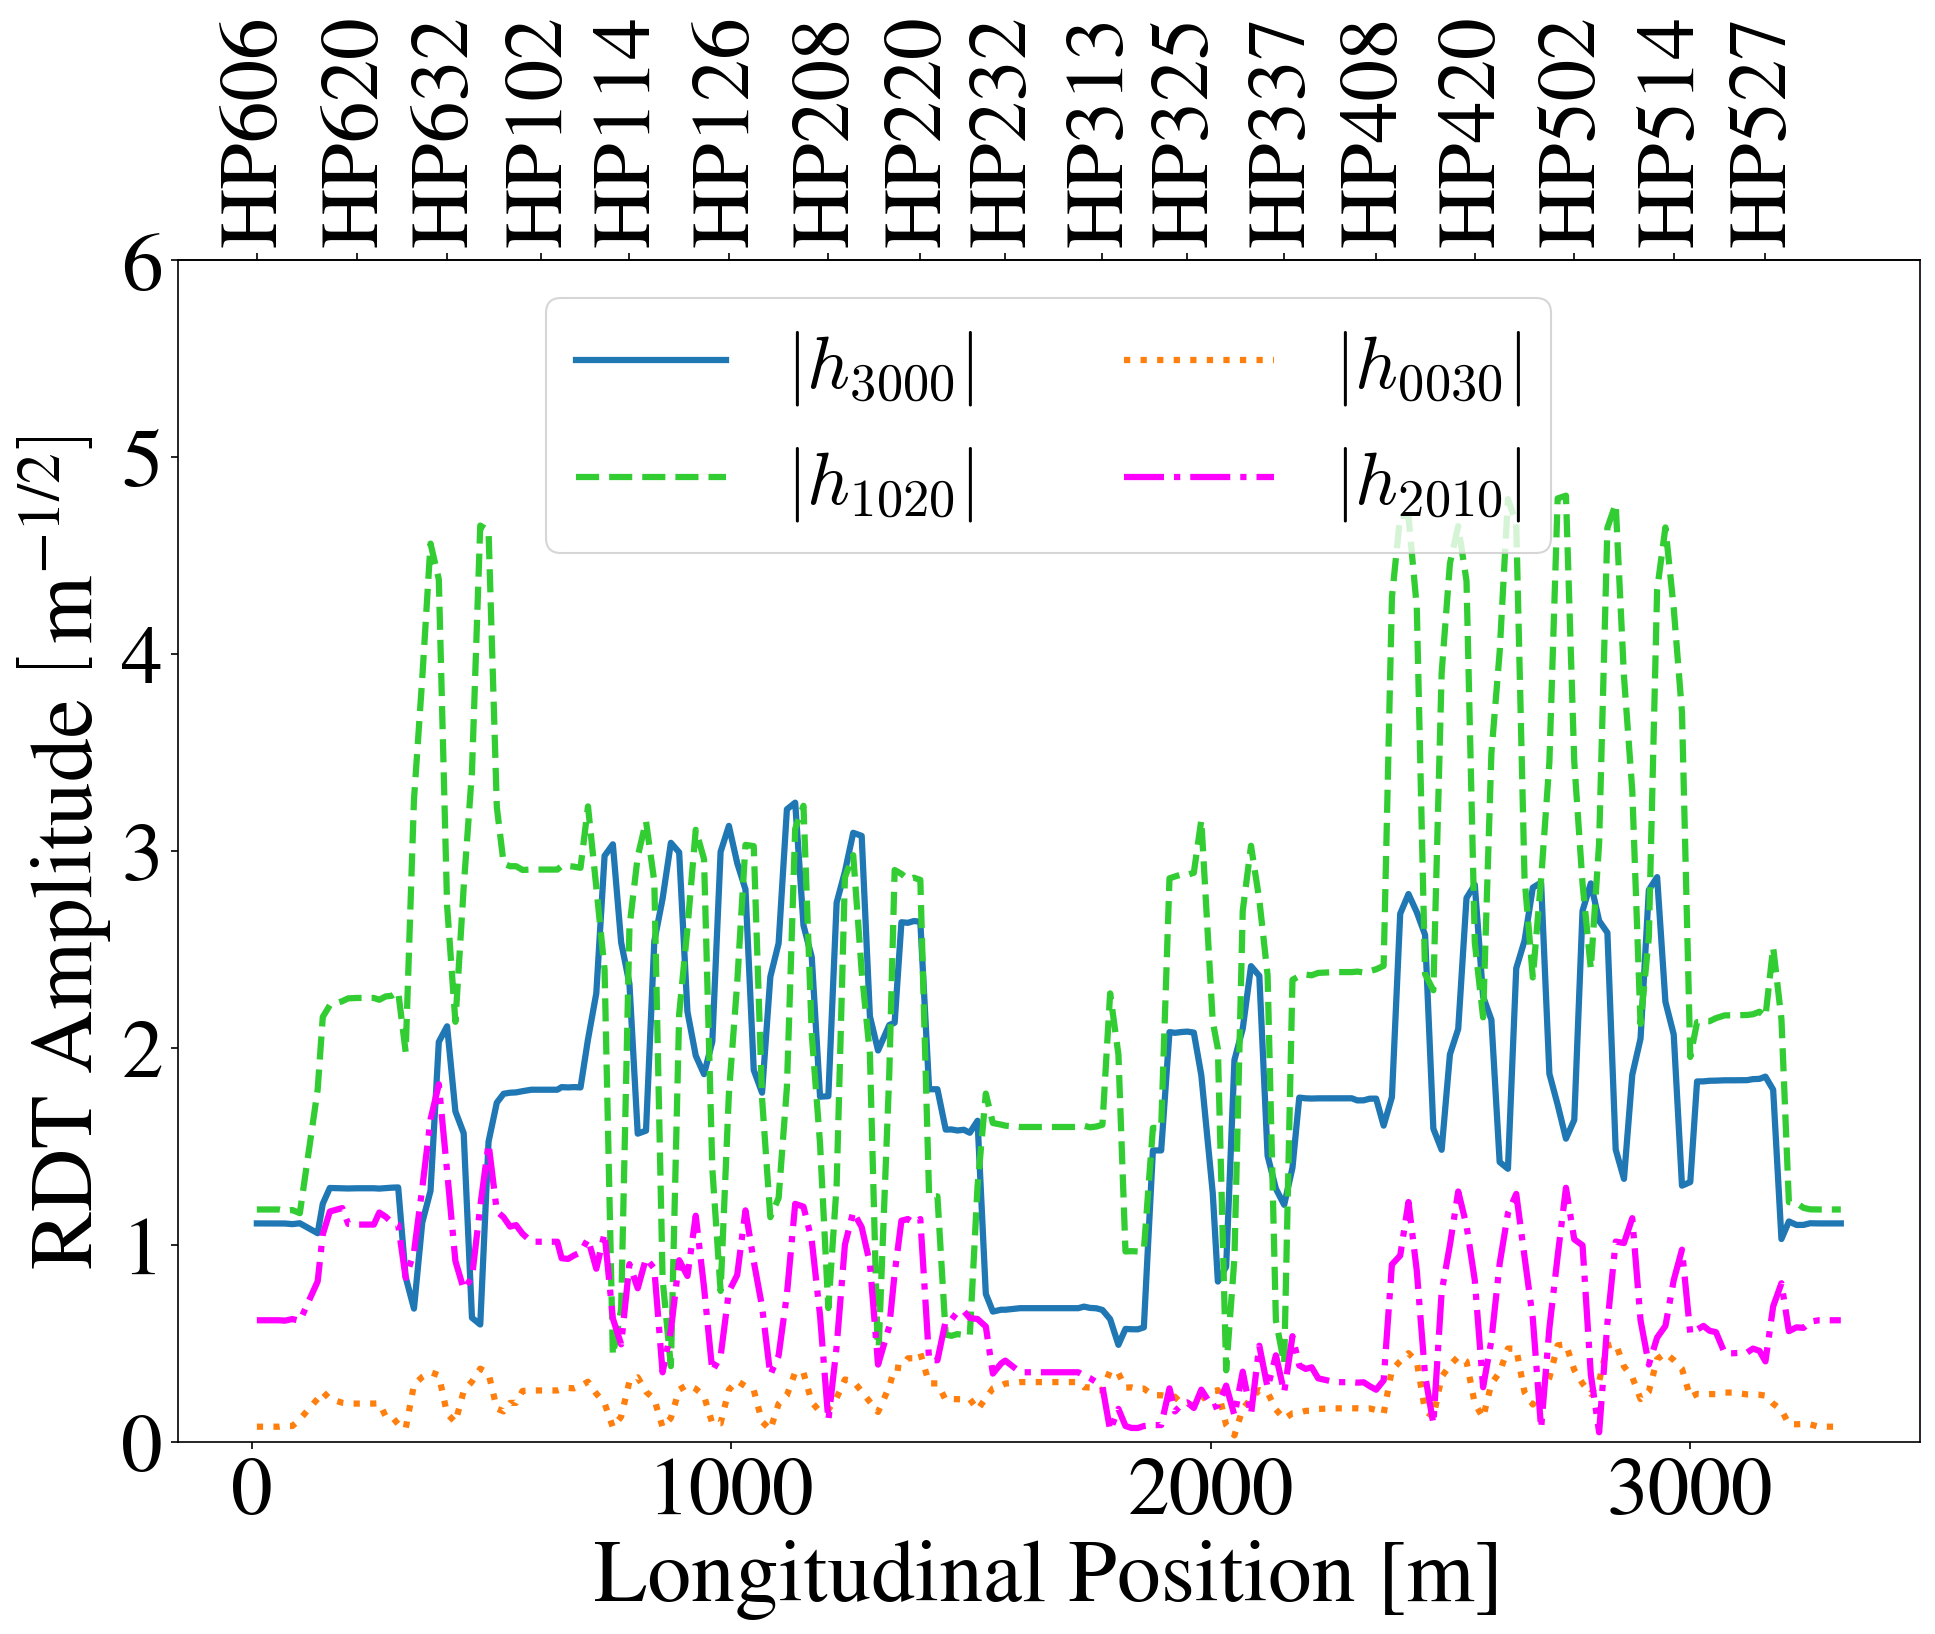

In [15]:
fig,ax = plt.subplots(1,1,figsize = (13,11))

fig.set_dpi(150)

ax.plot(ss,np.abs(h3000s), label = r'$|h_{3000}|$',linewidth = 3)
ax.plot(ss,np.abs(h1020s), linestyle = 'dashed',label = r'$|h_{1020}|$',c = 'limegreen',linewidth = 3)
ax.plot(ss,np.abs(h0030s), linestyle = 'dotted',label = r'$|h_{0030}|$',linewidth = 3)
ax.plot(ss,np.abs(h2010s), linestyle = 'dashdot',label = r'$|h_{2010}|$',c = 'fuchsia',linewidth = 3)


#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(0,6)

ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 42)

ax.tick_params(axis='both', labelsize=40)

ax.legend(loc = 'upper center',ncols = 2,fontsize = 36)

ax.set_xlabel('Longitudinal Position [m]',fontsize = 42)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::12])
axt.set_xticklabels(names[::12],rotation = 90,fontsize = 40)

plt.subplots_adjust(hspace=0.05)

plt.tight_layout()
# plt.savefig('hall_no_comp.png')
# plt.savefig('hall_no_comp.pdf')

plt.show()
plt.close()



In [16]:
fff[0]

NameError: name 'fff' is not defined

In [17]:
mad.table.summ['q1'][0]

np.float64(25.442147722261694)

In [18]:
mad.table

{'summ': <Table 'summ': {length, orbit5, alfa, gammatr, q1, dq1, betxmax, dxmax, dxrms, xcomax, xcorms, q2, dq2, betymax, dymax, dyrms, ycomax, ycorms, deltap, synch_1, synch_2, synch_3, synch_4, synch_5, synch_6, synch_8, nflips, dqmin, dqmin_phase}>, 'twiss': <Table 'twiss': {name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, k11l, k11sl, k12l, k12sl, k13l, k13sl, k14l, k14sl, k15l, k15sl, k16l, k16sl, k17l, k17sl, k18l, k18sl, k19l, k19sl, k20l, k20sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, v_pos, bbcharge, xma, yma, sigx, sigy, lrad, parent, comments, re11, re12, re13, re14, re15, re16, re21, re22, re23, re24, re25, re26, re31, re32, re33, re34, re35, re3

In [19]:
jklm

NameError: name 'jklm' is not defined

In [ ]:
'GNFC_%s_%s_%s_%s_0_0'%(jklm)

In [ ]:
np.abs(1.0-np.exp(2*np.pi*1j*3*qy))

In [20]:
hjklms_abs_mean = np.mean(np.abs(h3000s))
hjklms_abs_var = np.var(np.abs(h3000s))

In [21]:
hjklms_abs_mean

np.float64(1.7472499912737807)

In [22]:
hjklms_abs_var

np.float64(0.469103767072027)

In [23]:
np.sqrt(hjklms_abs_var)

np.float64(0.6849115030951276)